<a href="https://colab.research.google.com/github/revathichavala/basic/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [1]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#api to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 84% 137M/163M [00:01<00:00, 124MB/s]
100% 163M/163M [00:01<00:00, 140MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files =os.listdir('//content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2332.jpg', 'with_mask_615.jpg', 'with_mask_381.jpg', 'with_mask_557.jpg', 'with_mask_1313.jpg']
['with_mask_3185.jpg', 'with_mask_1247.jpg', 'with_mask_3398.jpg', 'with_mask_1484.jpg', 'with_mask_532.jpg']


In [8]:
without_mask_files =os.listdir('//content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3411.jpg', 'without_mask_1583.jpg', 'without_mask_3158.jpg', 'without_mask_1085.jpg', 'without_mask_889.jpg']
['without_mask_49.jpg', 'without_mask_1134.jpg', 'without_mask_1920.jpg', 'without_mask_1918.jpg', 'without_mask_2261.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:' ,len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of images

with mask ->1
without mask ->0

In [10]:
with_mask_labels= [1]*3725

without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying** **the** **Images**

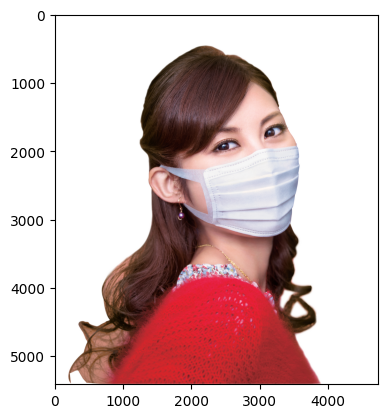

In [14]:
#displaying with mask image
img = mping.imread('/content/data/with_mask/with_mask_3185.jpg')
imgplot = plt.imshow(img)
plt.show()

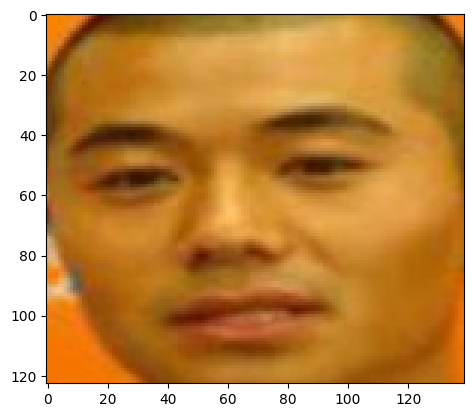

In [15]:
#displaying without mask
img = mping.imread('/content/data/without_mask/without_mask_49.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image** **Processing**


1.   Resize the image
2.   Convert the images to numpy arrays




In [17]:
#convert images to numpy arrays
with_mask_path ='/content/data/with_mask/'
data = []
for img_file in with_mask_files:


  image = Image.open(with_mask_path +img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path ='/content/data/without_mask/'

for img_file in without_mask_files:


  image = Image.open(without_mask_path +img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 21,  21,  21],
        [  6,   6,   6],
        [ 62,  62,  62],
        ...,
        [ 69,  69,  71],
        [ 62,  62,  64],
        [ 50,  49,  50]],

       [[ 22,  22,  22],
        [  7,   7,   7],
        [ 64,  64,  64],
        ...,
        [113, 113, 115],
        [ 64,  65,  67],
        [ 43,  42,  44]],

       [[ 21,  20,  21],
        [ 45,  44,  44],
        [  1,   0,   0],
        ...,
        [ 35,  35,  37],
        [ 93,  93,  95],
        [ 46,  45,  48]]], dtype=uint8)
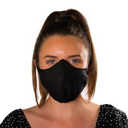

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
#converting the imagelists and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [24]:
type(x)
type(y)

numpy.ndarray

In [25]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[128, 124, 115],
        [127, 123, 114],
        [124, 120, 111],
        ...,
        [117, 117, 109],
        [120, 118, 109],
        [123, 119, 110]],

       [[128, 124, 115],
        [126, 122, 113],
        [123, 119, 110],
        ...,
        [117, 117, 109],
        [119, 117, 109],
        [122, 118, 109]],

       [[127, 123, 114],
        [126, 122, 113],
        [123, 119, 110],
        ...,
        [117, 117, 109],
        [119, 117, 109],
        [121, 117, 108]],

       ...,

       [[112, 111, 107],
        [112, 111, 107],
        [110, 109, 105],
        ...,
        [111, 110, 106],
        [112, 112, 107],
        [111, 112, 107]],

       [[114, 110, 107],
        [113, 111, 106],
        [113, 111, 107],
        ...,
        [110, 109, 105],
        [111, 111, 106],
        [111, 111, 106]],

       [[115, 110, 105],
        [116, 112, 106],
        [118, 115, 110],
        ...,
        [109, 108, 104],
        [110, 109, 105],
        [110, 109, 105]]], dtype=uint8)
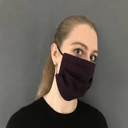

In [30]:
x_train[0]

In [31]:
x_train_scaled[0]

array([[[0.50196078, 0.48627451, 0.45098039],
        [0.49803922, 0.48235294, 0.44705882],
        [0.48627451, 0.47058824, 0.43529412],
        ...,
        [0.45882353, 0.45882353, 0.42745098],
        [0.47058824, 0.4627451 , 0.42745098],
        [0.48235294, 0.46666667, 0.43137255]],

       [[0.50196078, 0.48627451, 0.45098039],
        [0.49411765, 0.47843137, 0.44313725],
        [0.48235294, 0.46666667, 0.43137255],
        ...,
        [0.45882353, 0.45882353, 0.42745098],
        [0.46666667, 0.45882353, 0.42745098],
        [0.47843137, 0.4627451 , 0.42745098]],

       [[0.49803922, 0.48235294, 0.44705882],
        [0.49411765, 0.47843137, 0.44313725],
        [0.48235294, 0.46666667, 0.43137255],
        ...,
        [0.45882353, 0.45882353, 0.42745098],
        [0.46666667, 0.45882353, 0.42745098],
        [0.4745098 , 0.45882353, 0.42352941]],

       ...,

       [[0.43921569, 0.43529412, 0.41960784],
        [0.43921569, 0.43529412, 0.41960784],
        [0.43137255, 0

Building a Convolutional Neural Network(CNN)

In [32]:
import tensorflow as tf
from tensorflow import keras


In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3) ,activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64,kernel_size=(3,3) ,activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#compile the neural network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
#training the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.6731 - loss: 0.6951 - val_acc: 0.9008 - val_loss: 0.2652
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8834 - loss: 0.2946 - val_acc: 0.9025 - val_loss: 0.2448
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9154 - loss: 0.2260 - val_acc: 0.9107 - val_loss: 0.2210
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9300 - loss: 0.1862 - val_acc: 0.9140 - val_loss: 0.2166
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9360 - loss: 0.1597 - val_acc: 0.9223 - val_loss: 0.2083


**Model Evaluation**

In [39]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9196 - loss: 0.2194
Test Accuracy = 0.9179351329803467


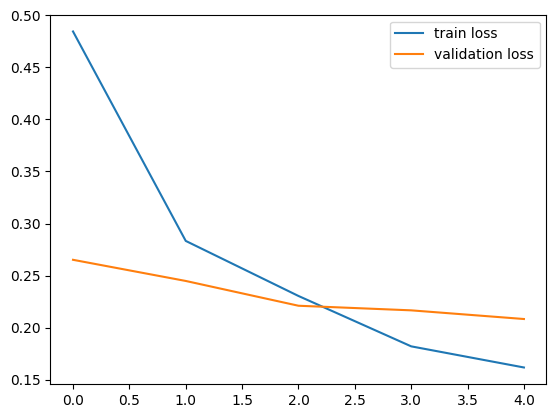

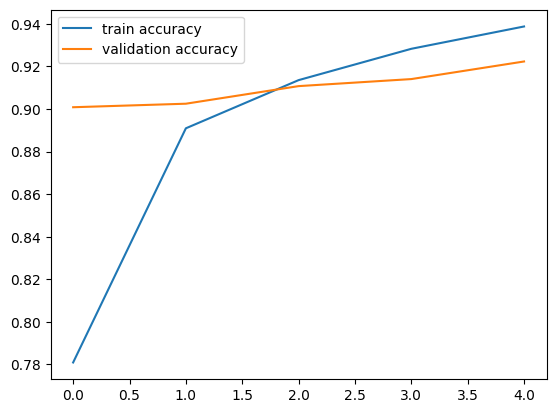

In [40]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted:/content/photo3.jpg


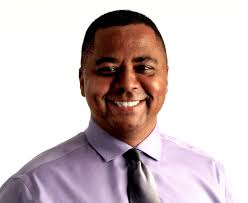

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.42048255 0.63702476]]
1
The person in the image is  wearing a mask


Path of the image to be predicted:/content/image1.png


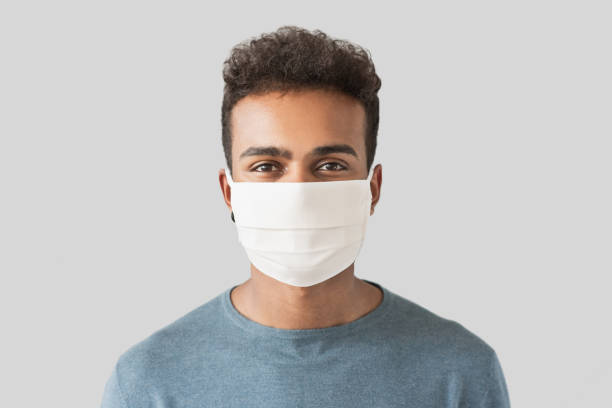

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.43885657 0.63919085]]
1
The person in the image is  wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted:')

input_image =cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is  wearing a mask')
else:
  print('The person in the image is  not   wearing a mask')